## Introduction:
 The dataset provided contains information about employment outcomes of engineering graduates from the Aspiring Mind Employment Outcome 2015 (AMEO) study. The dataset includes various attributes such as Salary, JobCity, Gender, Degree, Specialization, and scores from different skills assessments. The objective of this analysis is to explore the data and gain insights into the factors influencing employment outcomes for engineering graduates.


### Importing Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from fuzzywuzzy import process
from scipy.stats import ttest_ind
import warnings

C:\Users\Admin\anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


### Loading The Data

In [3]:
data=pd.read_csv("AMCAT_DATA.csv")

In [4]:
data.head() ##Etracting first five datapointa

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000.0,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000.0,7/1/11 0:00,present,senior software engineer,Gurgaon,m,12/5/89 0:00,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000.0,3/1/14 0:00,3/1/15 0:00,get,Manesar,m,2/27/91 0:00,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [5]:
data = data.drop(columns=['Unnamed: 0'])# droping the unnamed column

In [6]:
data.shape #checking theshape of the  dataset

(3998, 38)

In [7]:
data.info() #checking the data information including details about null values,datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     3998 non-null   int64  
 1   Salary                 3998 non-null   float64
 2   DOJ                    3998 non-null   object 
 3   DOL                    3998 non-null   object 
 4   Designation            3998 non-null   object 
 5   JobCity                3998 non-null   object 
 6   Gender                 3998 non-null   object 
 7   DOB                    3998 non-null   object 
 8   10percentage           3998 non-null   float64
 9   10board                3998 non-null   object 
 10  12graduation           3998 non-null   int64  
 11  12percentage           3998 non-null   float64
 12  12board                3998 non-null   object 
 13  CollegeID              3998 non-null   int64  
 14  CollegeTier            3998 non-null   int64  
 15  Degr

In [8]:
data.describe()  #checking stastical information of data

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,...,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,5156.851426,0.300400,...,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,3.632182e+05,2.127375e+05,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,4802.261482,0.458489,...,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,1.124400e+04,3.500000e+04,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,2.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,494.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,3879.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,8818.000000,1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,...,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


### Data Cleaning

In [9]:
data.isnull().sum()   # checking the null values

ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
o

In [10]:
data.columns

Index(['ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

##### column DOJ,DOL,DOB

In [11]:
data["DOJ"]=pd.to_datetime(data["DOJ"])        # converting date columns into datetime format
data["DOL"]=pd.to_datetime(data["DOL"].replace("present", pd.to_datetime("today").date()))
data["DOB"]=pd.to_datetime(data["DOB"])

##### column Designation

In [12]:
### Designation is in string no need to do typecasting
data["Designation"].head()  ## I observed that some unknown attribute 'get' appears in the 'Designation' column,
                             

0     senior quality engineer
1           assistant manager
2            systems engineer
3    senior software engineer
4                         get
Name: Designation, dtype: object

In [13]:
data['Designation'].replace('get', pd.NA, inplace=True)# Replace "get" with np.nan to make it recognizable as missing value
group_cols = ['Gender', 'Degree', 'Specialization']# Define the columns to group by for imputation

# Impute missing values in the "Designation" column based on mode of each group
data['Designation'] = data.groupby(group_cols)['Designation'].transform(lambda x: x.fillna(x.mode()[0]))

data['Designation'].fillna(data['Designation'].mode()[0], inplace=True)

#### column JobCity

In [14]:
### JobCity is in string no need to do typecasting
data["JobCity"].unique()
                             

array(['Bangalore', 'Indore', 'Chennai', 'Gurgaon', 'Manesar',
       'Hyderabad', 'Banglore', 'Noida', 'Kolkata', 'Pune', '-1',
       'mohali', 'Jhansi', 'Delhi', 'Hyderabad ', 'Bangalore ', 'noida',
       'delhi', 'Bhubaneswar', 'Navi Mumbai', 'Mumbai', 'New Delhi',
       'Mangalore', 'Rewari', 'Gaziabaad', 'Bhiwadi', 'Mysore', 'Rajkot',
       'Greater Noida', 'Jaipur', 'noida ', 'HYDERABAD', 'mysore',
       'THANE', 'Maharajganj', 'Thiruvananthapuram', 'Punchkula',
       'Bhubaneshwar', 'Pune ', 'coimbatore', 'Dhanbad', 'Lucknow',
       'Trivandrum', 'kolkata', 'mumbai', 'Gandhi Nagar', 'Una',
       'Daman and Diu', 'chennai', 'GURGOAN', 'vsakhapttnam', 'pune',
       'Nagpur', 'Bhagalpur', 'new delhi - jaisalmer', 'Coimbatore',
       'Ahmedabad', 'Kochi/Cochin', 'Bankura', 'Bengaluru', 'Mysore ',
       'Kanpur ', 'jaipur', 'Gurgaon ', 'bangalore', 'CHENNAI',
       'Vijayawada', 'Kochi', 'Beawar', 'Alwar', 'NOIDA', 'Greater noida',
       'Siliguri ', 'raipur', 'gurgaon',

I observed misspellings in city names where the same city is repeated two or more times. I want to correct these misspellings and consolidate duplicate entries into one

In [15]:
data["JobCity"]=data["JobCity"].str.lower()  #converting names into lowercase
unique_college_cities = data["JobCity"].unique()# Define a list of unique college city names

# Function to find the best match for a given city name
def find_best_match(city_name, choices):
    return process.extractOne(city_name, choices)[0]

# Apply the function to correct spelling in the "CollegeCity" column
data["JobCity"] = data["JobCity"].apply(lambda x: find_best_match(x, unique_college_cities))

In [80]:
data["JobCity"].nunique()

231

In [81]:
# Mapping dictionary for correcting city names
city_mapping = {
    'bangalore': 'bengaluru',
    'new delhi': 'delhi',
    'noida': 'greater noida',  # Merge 'noida' with 'greater noida'
    'bhubaneswar': 'bhubneshwar',  # You can choose one of the variations ('bhubneshwar' or 'bhubaneshwar')
    'bhubaneshwar': 'bhubneshwar',
    'visakhapatnam': 'vizag',
    "thiruvananthapuram":"trivandrum",
    "kochi":"cohin",
    "kochi/cohin":"cohin"
}

# Apply the mapping to the 'JobCity' column
data['JobCity'] = data['JobCity'].replace(city_mapping)

# Check unique values in the 'JobCity' column after mapping
print(data['JobCity'].nunique())


224


In [82]:
# Count the occurrences of each city in the JobCity column
city_counts = data['JobCity'].value_counts()

# Get the list of cities with count equals to 1
single_count_cities = city_counts[city_counts == 1].index.tolist()

# Replace the single-count cities with 'Others'
data.loc[data['JobCity'].isin(single_count_cities), 'JobCity'] = 'Others'

In [83]:
data['JobCity'].value_counts()

bengaluru        670
-1               461
greater noida    418
hyderabad        368
pune             327
                ... 
vijayawada         2
hissar             2
neemrana           2
pantnagar          2
pilani             2
Name: JobCity, Length: 85, dtype: int64

Here i observed "-1" as null value i want to  impute those null values with data related to other columns.

In [84]:
data['JobCity'].replace('-1', np.nan, inplace=True)# Replace -1 with NaN in the JobCity column
# Define the columns to group by
group_columns = ['CollegeState', 'Designation', 'Gender']
def fill_null_with_group_mode(group):# Function to fill missing values with mode of each group
    mode = group.mode()
    if not mode.empty:
        return group.fillna(mode.iloc[0])
    else:
        return group.fillna(group.iloc[0])

# Apply groupby and transform to fill null values with group mode
data['JobCity'] = data.groupby(group_columns)['JobCity'].transform(fill_null_with_group_mode)

In [85]:
data['JobCity'].value_counts()

bengaluru        740
greater noida    493
hyderabad        391
pune             350
chennai          333
                ... 
unnao              2
gandhi nagar       2
vijayawada         2
cohin              2
pilani             2
Name: JobCity, Length: 84, dtype: int64

In [86]:
data.columns

Index(['ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience',
       'Am_Score', 'ovr_all_perc', 'Experience_years', 'Age'],
      dtype='object')

#### column Gender

In [87]:
#### Gender is in string type no need to do type casting
data["Gender"].unique()

array(['f', 'm'], dtype=object)

The data in the column appears to be correct, so there is no need for further data cleaning for that particular column.

####  column 10percentage

In [88]:
#10percentage is in float type no need to do type casting
data["10percentage"].dtype

dtype('float64')

In [89]:
data[(data["10percentage"]==0) | (data["10percentage"]==-1)]

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Am_Score,ovr_all_perc,Experience_years,Age


The data in the column appears to be correct, so there is no need for further data cleaning for that particular column

#### column 10board

In [90]:
#10board is in string type no need to do type casting
data["10board"].dtypes

dtype('O')

In [91]:
data["10board"].value_counts()

cbse                          1395
state board                   1164
0                              350
icse                           281
ssc                            122
                              ... 
hse,orissa                       1
national public school           1
nagpur board                     1
jharkhand academic council       1
bse,odisha                       1
Name: 10board, Length: 275, dtype: int64

 here i observed null value so i want to impute those null values with unknown

In [92]:
data['10board'].replace("0", np.nan, inplace=True)# Replace 0 values with NaN
data.fillna(data.mode().iloc[0],inplace=True)# impute with mode method

In [93]:
data["10board"].value_counts()

cbse                          1745
state board                   1164
icse                           281
ssc                            122
up board                        85
                              ... 
hse,orissa                       1
national public school           1
nagpur board                     1
jharkhand academic council       1
bse,odisha                       1
Name: 10board, Length: 274, dtype: int64

#### column 12graduation

In [94]:
#12graduation is in string type no need to do type casting
data["10board"].dtypes

dtype('O')

In [95]:
data["12graduation"].value_counts()

2009    1052
2008     935
2010     742
2007     528
2006     407
2005     160
2004      73
2011      46
2003      25
2002      14
2012      10
2001       2
1995       1
1998       1
2013       1
1999       1
Name: 12graduation, dtype: int64

The data in the column appears to be correct, so there is no need for further data cleaning for that particular column

#### column12percentage

In [96]:
#12percentage is in is in float type no need to do type casting
data["12percentage"].dtypes

dtype('float64')

In [97]:
data[(data["12percentage"]==0) | (data["12percentage"]==-1)]

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Am_Score,ovr_all_perc,Experience_years,Age


The data in the column appears to be correct, so there is no need for further data cleaning for that particular column

#### column 12board

In [98]:
#12board is in is in string type no need to do type casting
data["12board"].dtypes

dtype('O')

In [99]:
data['12board'].replace("0", np.nan, inplace=True)# Replace 0 values with NaN
data.fillna(data.mode().iloc[0],inplace=True)# impute with mode method
brds_12 = data['12board'].value_counts()# Count the occurrences of each city in the JobCity column
brds_12_cities = brds_12[brds_12 <= 50].index.tolist()# Get the list of cities with count equals to 1
data.loc[data['12board'].isin(brds_12_cities), '12board'] = 'Others'
# Replace the single-count cities with 'Others'

In [100]:
data['12board'].value_counts()

cbse           1759
state board    1254
Others          769
icse            129
up board         87
Name: 12board, dtype: int64

#### column CollegeTier

In [101]:
#CollegeTier is in is in string type no need to do type casting
data["CollegeTier"].unique()

array([2, 1], dtype=int64)

The data in the column appears to be correct, so there is no need for further data cleaning for that particular column



#### column Degree

In [102]:
#Degree is in is in string type no need to do type casting
data["Degree"].unique()

array(['B.Tech/B.E.', 'MCA', 'M.Tech./M.E.', 'M.Sc. (Tech.)'],
      dtype=object)

The data in the column appears to be correct, so there is no need for further data cleaning for that particular column

#### column Specialization

In [103]:
#Specialization is in is in string type no need to do type casting
data["Specialization"].unique()

array(['computer engineering',
       'electronics and communication engineering',
       'information technology', 'computer science & engineering',
       'mechanical engineering', 'electronics and electrical engineering',
       'electronics & telecommunications',
       'instrumentation and control engineering', 'computer application',
       'electronics and computer engineering', 'electrical engineering',
       'applied electronics and instrumentation',
       'electronics & instrumentation eng',
       'information science engineering', 'civil engineering',
       'mechanical and automation', 'industrial & production engineering',
       'control and instrumentation engineering',
       'metallurgical engineering',
       'electronics and instrumentation engineering',
       'electronics engineering', 'ceramic engineering',
       'chemical engineering', 'aeronautical engineering', 'other',
       'biotechnology', 'embedded systems technology',
       'electrical and power engi

In [104]:
data['Specialization'].replace(["computer engineering", "computer application",'computer and communication engineering','computer networking'], "computer science & engineering", inplace=True)
data['Specialization'].replace("electronics & telecommunications", "electronics and communication engineering", inplace=True)
data['Specialization'].replace("electrical engineering", "electronics and electrical engineering", inplace=True)
data['Specialization'].replace(["mechanical and automation","industrial & production engineering","aeronautical engineering","metallurgical engineering","automobile/automotive engineering","mechanical & production engineering",'industrial engineering','metallurgical engineering','power systems and automation','instrumentation engineering','instrumentation and control engineering','industrial & management engineering', 'industrial engineering'], "mechanical engineering", inplace=True)

In [105]:
spec_count=data['Specialization'].value_counts()
# Get the list of cities with count equals to 1
single_count_cities = spec_count[spec_count<=50].index.tolist()

# Replace the single-count cities with 'Others'
data.loc[data['Specialization'].isin(single_count_cities),'Specialization'] = 'Others'

In [106]:
data['Specialization'].value_counts()

computer science & engineering               1590
electronics and communication engineering    1001
information technology                        660
electronics and electrical engineering        278
mechanical engineering                        255
Others                                        214
Name: Specialization, dtype: int64

#### column CollegeCityTier, CollegeState

In [107]:
#CollegeCityTier, CollegeState both are in string type no need to do type casting
data["CollegeCityTier"].unique()

array([0, 1], dtype=int64)

In [108]:
data["CollegeState"].unique()

array(['Andhra Pradesh', 'Madhya Pradesh', 'Uttar Pradesh', 'Delhi',
       'Karnataka', 'Tamil Nadu', 'West Bengal', 'Maharashtra', 'Haryana',
       'Telangana', 'Orissa', 'Punjab', 'Kerala', 'Gujarat', 'Rajasthan',
       'Chhattisgarh', 'Uttarakhand', 'Jammu and Kashmir', 'Jharkhand',
       'Himachal Pradesh', 'Bihar', 'Assam', 'Goa', 'Sikkim',
       'Union Territory', 'Meghalaya'], dtype=object)

The data in the column appears to be correct, so there is no need for further data cleaning for that particular column

#### Numerical columns

<AxesSubplot:>

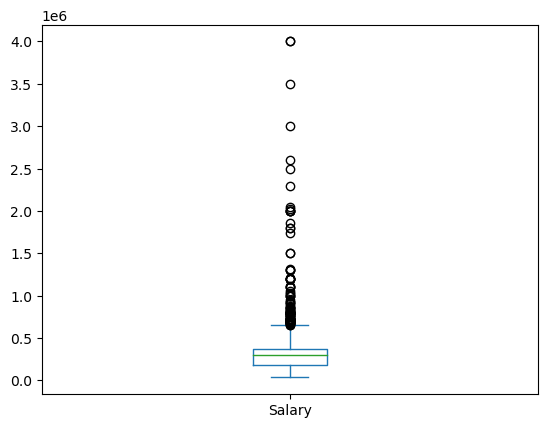

In [109]:
##### Target Column as salary
#### it is in float no need to convert type casting
data["Salary"].plot(kind="box")

#### Finding Outliers on salary

In [110]:
q1=data["Salary"].quantile(0.25)
q3=data["Salary"].quantile(0.75)
iqr=q3-q1

In [111]:
iqr

190000.0

In [112]:
lower_boundary=q1-iqr*0.5
upper_boundary=q3-iqr*0.5
print("lower_boundary:",lower_boundary)
print("upper_boundary:",upper_boundary)

lower_boundary: 85000.0
upper_boundary: 275000.0


#### Detection of '-1' Values in Each Column

In [113]:
def null_values_count_columns(data):
    for col in data.columns:
        # Check if -1 is a string or an integer
        if isinstance(data[col].iloc[0], str):
            counts = data[col].eq("-1").value_counts()
        else:
            counts = data[col].eq(-1).value_counts()
        print(f"{col}:")
        print(f"False: {counts.get(False, 0)}")
        print(f"True: {counts.get(True, 0)}")
        print()

null_values_count_columns(data)

ID:
False: 3998
True: 0

Salary:
False: 3998
True: 0

DOJ:
False: 3998
True: 0

DOL:
False: 3998
True: 0

Designation:
False: 3998
True: 0

JobCity:
False: 3998
True: 0

Gender:
False: 3998
True: 0

DOB:
False: 3998
True: 0

10percentage:
False: 3998
True: 0

10board:
False: 3998
True: 0

12graduation:
False: 3998
True: 0

12percentage:
False: 3998
True: 0

12board:
False: 3998
True: 0

CollegeID:
False: 3998
True: 0

CollegeTier:
False: 3998
True: 0

Degree:
False: 3998
True: 0

Specialization:
False: 3998
True: 0

collegeGPA:
False: 3998
True: 0

CollegeCityID:
False: 3998
True: 0

CollegeCityTier:
False: 3998
True: 0

CollegeState:
False: 3998
True: 0

GraduationYear:
False: 3998
True: 0

English:
False: 3998
True: 0

Logical:
False: 3998
True: 0

Quant:
False: 3998
True: 0

Domain:
False: 3752
True: 246

ComputerProgramming:
False: 3130
True: 868

ElectronicsAndSemicon:
False: 1144
True: 2854

ComputerScience:
False: 902
True: 3096

MechanicalEngg:
False: 235
True: 3763

Electrical

Domain: 246 null values

ComputerProgramming: 868 null values

ElectronicsAndSemicon: 2854 null values

ComputerScience: 3096 null values

MechanicalEngg: 3763 null values

ElectricalEngg: 3837 null values

TelecomEngg: 3624 null values

CivilEngg: 3956 null values


#### Independent t-test between cleaned data and data with nulls

In [114]:
columns_with_missing_values = ['Domain', 'ComputerProgramming', 'ElectronicsAndSemicon', 
                               'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 
                               'TelecomEngg', 'CivilEngg']

# Assuming `cleaned_data` and `data_with_nulls` are your two dataframes

# Extract the columns of interest
columns_of_interest = ['Domain', 'ComputerProgramming', 'ElectronicsAndSemicon', 
                       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 
                     'TelecomEngg', 'CivilEngg']
# Replace '-1' with NaN and drop rows with NaN in specified columns
cleaned_data = data.replace('-1', float('nan')).dropna(subset=columns_with_missing_values)
# Perform t-test for each column
for column in columns_of_interest:
    # Extract the data for the column from both datasets
    cleaned_data_col = cleaned_data[column]  # Drop NaN values
    data_with_nulls_col = data[column]  # Drop NaN values
    
    # Perform t-test
    t_statistic, p_value = ttest_ind(cleaned_data_col, data_with_nulls_col, equal_var=False)
    
    # Print the results
    print(f"Column: {column}")
    print(f"T-statistic: {t_statistic}")
    print(f"P-value: {p_value}")
    if p_value < 0.05:
        print("The difference in means is statistically significant.")
    else:
        print("The difference in means is not statistically significant.")
    print()


Column: Domain
T-statistic: 0.0
P-value: 1.0
The difference in means is not statistically significant.

Column: ComputerProgramming
T-statistic: 0.0
P-value: 1.0
The difference in means is not statistically significant.

Column: ElectronicsAndSemicon
T-statistic: 0.0
P-value: 1.0
The difference in means is not statistically significant.

Column: ComputerScience
T-statistic: 0.0
P-value: 1.0
The difference in means is not statistically significant.

Column: MechanicalEngg
T-statistic: 0.0
P-value: 1.0
The difference in means is not statistically significant.

Column: ElectricalEngg
T-statistic: 0.0
P-value: 1.0
The difference in means is not statistically significant.

Column: TelecomEngg
T-statistic: 0.0
P-value: 1.0
The difference in means is not statistically significant.

Column: CivilEngg
T-statistic: 0.0
P-value: 1.0
The difference in means is not statistically significant.



1)If the p-values for all columns are very high (close to 1.0), it suggests that there is no statistically significant difference in means between the data with null values (data_with_nulls) and the cleaned data (cleaned_data).

2)This means that removing the null values did not have a significant impact on the means of these columns. Therefore, you can conclude that the presence or absence of null values in these columns does not affect their means.

## Feature Engineering

#### manipulating and transforming the existing features or variables in the dataset 

In [115]:
data['Experience_years'] = (datetime.now() - data['DOJ']) / pd.Timedelta(days=365)

In [116]:
data['Experience_years'] = (datetime.now() - data['DOJ']) / pd.Timedelta(days=365)# Calculate experience in years

In [117]:
# Get the current date
current_date = datetime.now()
# Calculate the age
data['Age'] = (current_date - data['DOB']).astype('<m8[Y]')

In [118]:
data["Age"].head()

0    34.0
1    34.0
2    31.0
3    34.0
4    32.0
Name: Age, dtype: float64

In [119]:
# Sort the data by 'DOJ' in ascending order
data.sort_values(by='DOJ', inplace=True)

# Calculate the career gap by subtracting the 'DOL' of one job from the 'DOJ' of the next job
data['Career_Gap'] = (data['DOJ'].shift(-1) - data['DOL']).dt.days
# Convert the career gap to years for better readability
data['Career_Gap'] = data['Career_Gap'] / 365.25  # Approximate number of days in a year

# You may want to round off the career gap to a certain number of decimal places
data['Career_Gap'] = data['Career_Gap'].round(2)

# Now 'Career_Gap' column contains the calculated career gap in years
print(data['Career_Gap'].head()) 

2853   -19.56
562      0.84
1189   -17.06
3516    -0.75
3193    -1.92
Name: Career_Gap, dtype: float64


Here i oserved that The negative values in the "Career_Gap" column indicate overlapping job periods, which suggests that the individual started their next job before ending their previous one. This might be due to various reasons such as contract extensions, part-time employment, or transitioning between roles within the same organization. However, it's important to review the data and understand the context behind these overlapping periods to ensure accurate interpretation

In [120]:
# List of technical skills columns
technical_skills_columns = ['ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience', 
                            'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg']

# Calculate overall technical skills score by summing up scores from each column
data['TechnicalSkillsScore'] = data[technical_skills_columns].sum(axis=1)

# Print first few rows to verify
print(data[['ID', 'TechnicalSkillsScore']].head())
data['Am_Score']=(data['Logical']+data['Quant']+data['English'])/3


          ID  TechnicalSkillsScore
2853  611964                   579
562   220601                   599
1189  958809                   349
3516  332810                   569
3193  480729                    -7


In [163]:

# Creating a pivot table to analyze the relationships between technical skills score, AM score, gender, salary, and specialization
pivot_table = pd.pivot_table(data, 
                             values=['TechnicalSkillsScore', 'Am_Score', 'Salary'], 
                             index=['Gender', 'Specialization'],
                             aggfunc="mean")


In [164]:
pivot_table

Am_Score         Salary  \
Gender Specialization                                                         
f      Others                                     498.622642  263679.245283   
       computer science & engineering             496.450040  307853.717026   
       electronics and communication engineering  504.095833  276583.333333   
       electronics and electrical engineering     496.006536  304215.686275   
       information technology                     490.088632  288699.421965   
       mechanical engineering                     527.159420  350652.173913   
m      Others                                     519.157350  335776.397516   
       computer science & engineering             504.219096  316794.543905   
       electronics and communication engineering  516.632063  302674.113009   
       electronics and electrical engineering     506.790015  285506.607930   
       information technology                     499.279261  315523.613963   
       mechanical engineering                     509.225575  316655.172414   

                                                  TechnicalSkillsScore  
Gender Specialization                                                   
f      Others                                               520.735849  
       computer science & engineering                       591.235012  
       electronics and communication engineering            668.337500  
       electronics and electrical engineering               621.372549  
       information technology                               545.364162  
       mechanical engineering                               610.565217  
m      Others                                               517.409938  
       computer science & engineering                       620.427110  
       electronics and communication engineering            685.220762  
       electronics and electrical engineering               659.352423  
       information technology                               577.733060  
       mechanical engineering                               488.146552

It appears that individuals tend to choose their specialization based on their academic performance, as indicated by their AM scores and technical skills scores. However, their eventual salary is influenced by factors beyond specialization, such as industry demand, experience, negotiation skills, and company policies. Therefore, while academic performance may influence specialization choice, it may not directly determine salary outcomes.

In [123]:

# Assuming 'data' is your DataFrame with columns such as 'Gender', 'Department', 'Experience', 'Salary', and 'Efficiency'

# Define groupby criteria and aggregation functions
groupby_criteria = ['Gender', 'Designation', 'Experience_years']
aggregation_functions = {
    'Salary': 'mean'
    
}

# Perform groupby operation
grouped_data = data.groupby(groupby_criteria).agg(aggregation_functions)

# Print or visualize the results
print(grouped_data)


                                                    Salary
Gender Designation              Experience_years          
f      .net developer           9.317882          100000.0
                                9.569937          340000.0
                                9.821991          240000.0
                                10.317882         250000.0
                                10.485005         252500.0
...                                                    ...
m      web developer            11.904183         240000.0
                                12.068567         145000.0
                                12.657608         100000.0
                                12.906923         300000.0
       website developer/tester 9.485005          200000.0

[2591 rows x 1 columns]


In [124]:
# Sort the grouped data by the criterion of interest (e.g., median salary)
sorted_data = grouped_data.sort_values(by='Salary', ascending=False)

# Select the top 5 groups
top_5_data = sorted_data.head(5)

# Print or visualize the top 5 data
print(top_5_data)


                                                      Salary
Gender Designation               Experience_years           
m      automation engineer       14.153498         4000000.0
f      assistant system engineer 11.150759         3500000.0
m      application developer     12.657608         2600000.0
       software test engineer    11.904183         2500000.0
       software engineer trainee 8.904183          2050000.0


The data reveals notable variations in salaries across different groups, including gender, job titles, and years of experience. These differences underscore the need to address potential inequalities in salary distribution and promote fairness and equity in compensation practices, particularly with regards to gender disparities.

## Data Visualization

### Univariant Analysis

#### Categorical

#### Top 10 Job Cities

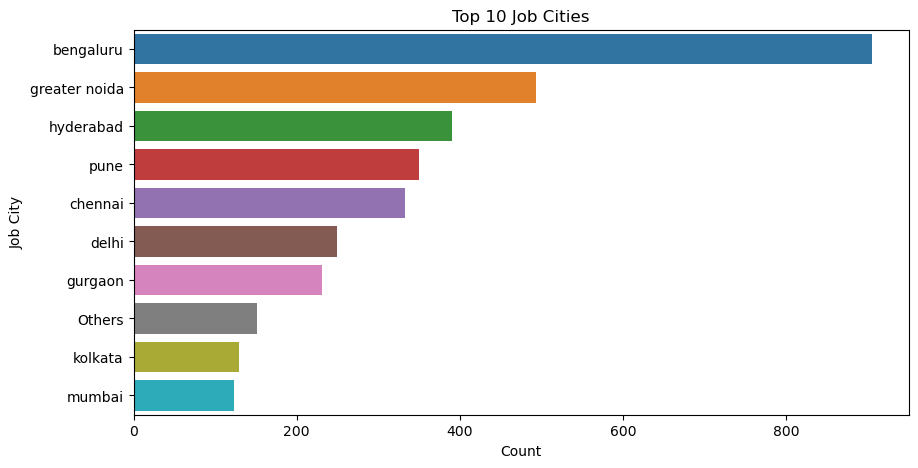

In [125]:
import seaborn as sns

# Get the top 10 most frequent categories
top_10_job_cities = data['JobCity'].value_counts().head(10).index
data_top_10 = data[data['JobCity'].isin(top_10_job_cities)]
plt.figure(figsize=(10, 5))
sns.countplot(data=data_top_10, y='JobCity', order=top_10_job_cities, orient='h')
plt.xlabel('Count')
plt.ylabel('Job City')
plt.title('Top 10 Job Cities')
plt.show()


1)Bengaluru appears to be the most frequent job city in the dataset, indicating a high concentration of job opportunities in this area.

2)Greater Noida emerges as another notable job city, suggesting a significant presence of employment opportunities, although less frequent compared to Bengaluru

#### Count of genders

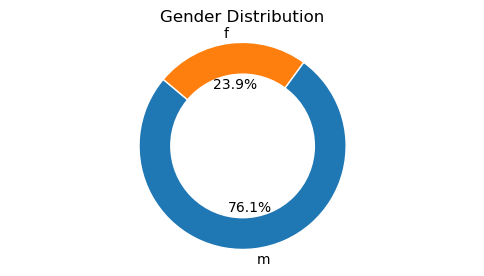

In [126]:


# Calculate value counts for Gender
gender_counts = data['Gender'].value_counts()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(6, 3))

# Create the outer pie chart
outer_colors = ['#1f77b4', '#ff7f0e']  # Colors for male and female
wedges, texts, autotexts = ax.pie(gender_counts, labels=gender_counts.index, colors=outer_colors, autopct='%1.1f%%', startangle=140)

# Make the pie chart a donut chart (hollow)
for wedge in wedges:
    wedge.set_edgecolor('white')

# Create a white circle in the middle to make it hollow
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Add a title
plt.title('Gender Distribution')

plt.show()



The dataset consists of 76.1% males and the remaining 23.9% are females

#### Specilization count

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


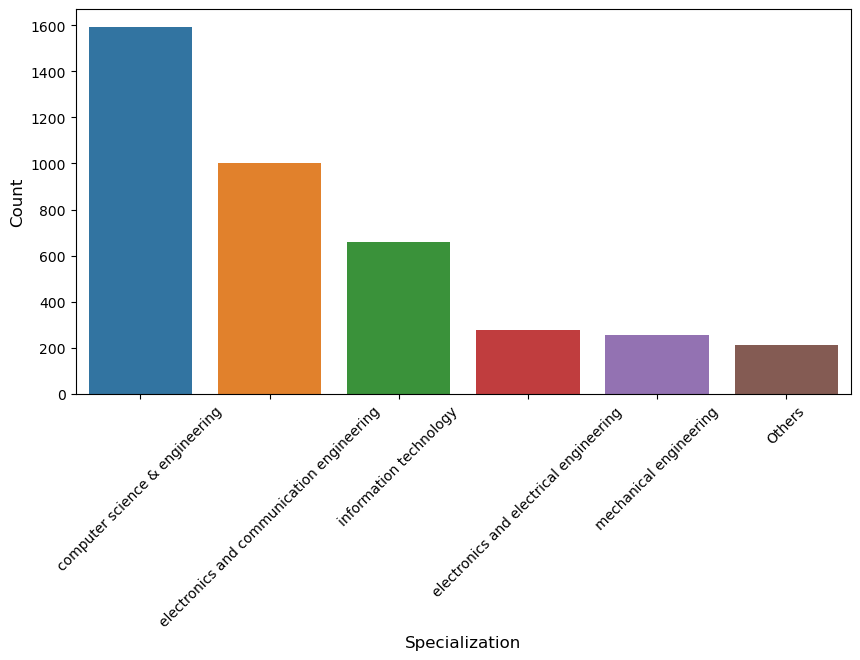

In [127]:
specialization_counts = data['Specialization'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.countplot(data['Specialization'], order=specialization_counts.index,orient='h')
plt.xlabel('Specialization', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()


the most common specialization is 'Computer Science & Engineering', with 1588 individuals. This is followed by 'Electronics and Communication Engineering' with 1001 individuals, and 'Information Technology' with 660 individuals. Other notable specializations include 'Electronics and Electrical Engineering' with 278 individuals, 'Others' with 270 individuals, and 'Mechanical Engineering' with 201 individuals

#### Degree counts

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


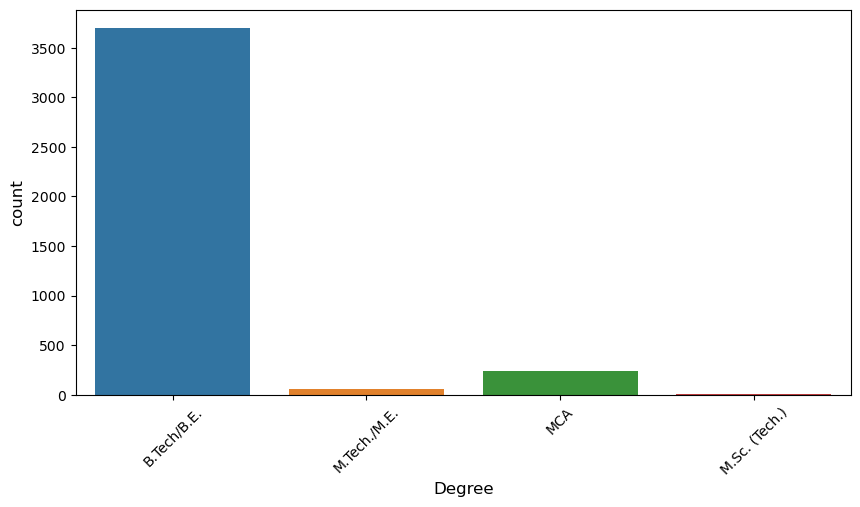

In [128]:
# Calculate value counts for Degree and sort in descending order
degree_counts = data['Degree'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.countplot(data['Degree'])
plt.xlabel('Degree', fontsize=12)
plt.ylabel('count', fontsize=12)
plt.xticks(rotation=45)
plt.show()


A significant portion of Amcat aspirants possess a background in the Btech domain.

#### Top 15 Designations

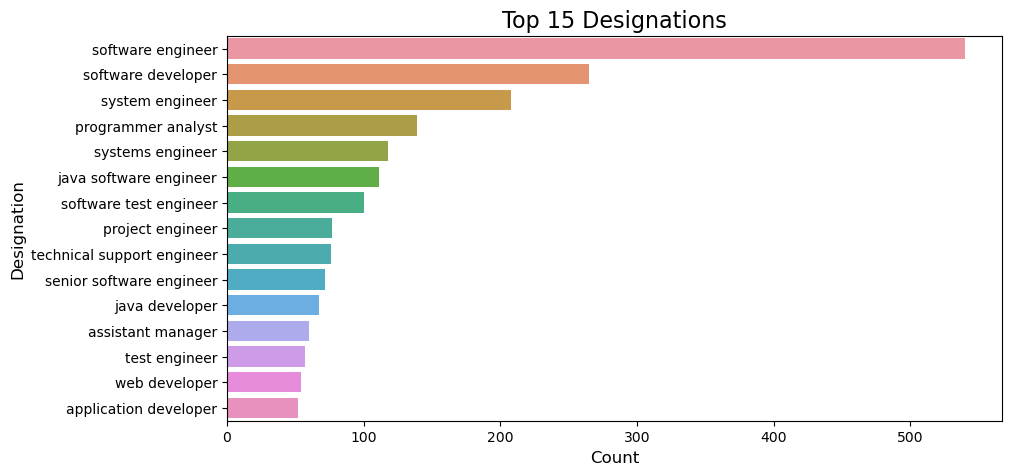

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate value counts for Designation and sort in descending order
designation_counts = data['Designation'].value_counts().sort_values(ascending=False)

# Select the top 15 designations
top_15_designations = designation_counts.head(15)

# Create a countplot for the top 15 designations
plt.figure(figsize=(10,5))
sns.countplot(data=data[data['Designation'].isin(top_15_designations.index)], y='Designation', order=top_15_designations.index)

# Add x and y-axis labels
plt.xlabel('Count', fontsize=12)
plt.ylabel('Designation', fontsize=12)

# Add a title
plt.title('Top 15 Designations', fontsize=16)

plt.show()



The most common designations among Amcat aspirants include software engineer, software developer, and system engineer

#### Distribution of College States

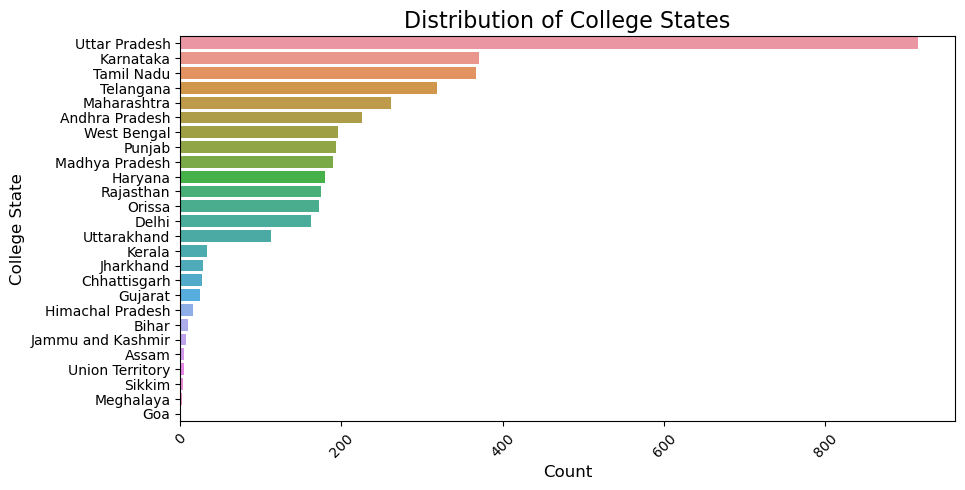

In [130]:
college_state_counts = data['CollegeState'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.countplot(data=data, y='CollegeState', order=college_state_counts.index)
plt.xlabel('Count', fontsize=12)
plt.ylabel('College State', fontsize=12)
plt.title('Distribution of College States', fontsize=16)
plt.xticks(rotation=45)

plt.show()

1)The dataset contains a significant representation of colleges from Uttar Pradesh, indicating a strong presence of educational institutions from this state.

2)Karnataka follows Uttar Pradesh with a substantial number of colleges, suggesting a notable educational infrastructure in the region.

3)Tamil Nadu and Telangana exhibit similar levels of representation, indicating comparable educational landscapes in these states.

#### Distribution of JobCity

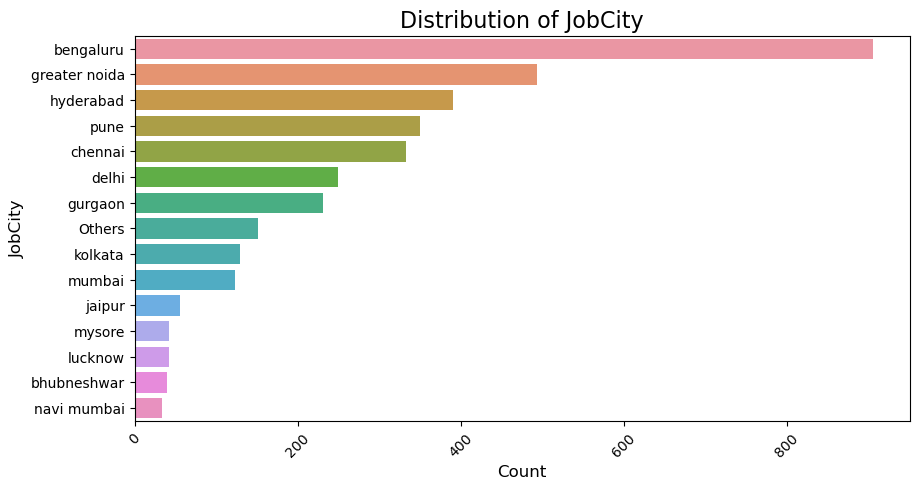

In [131]:
# Calculate value counts for JobCity and sort in descending order
job_city_counts = data['JobCity'].value_counts().sort_values(ascending=False)
top_15_job_city = job_city_counts.head(15)
plt.figure(figsize=(10, 5))
sns.countplot(data=data[data['JobCity'].isin(top_15_job_city.index)], y='JobCity', order=top_15_job_city.index)
plt.xlabel('Count', fontsize=12)
plt.ylabel('JobCity', fontsize=12)
plt.title('Distribution of JobCity', fontsize=16)
plt.xticks(rotation=45)

plt.show()


1)Identification of the top job cities where individuals in the dataset are primarily employed, based on the frequency of occurrences.

2)Comparison of the distribution of job cities, highlighting any significant differences in the number of individuals employed in each city.

3)Exploration of potential geographical patterns or preferences in job location among the individuals in the dataset.

### Univariant Analysis 

#### Numerical

#### Histogram with KDE of Salary

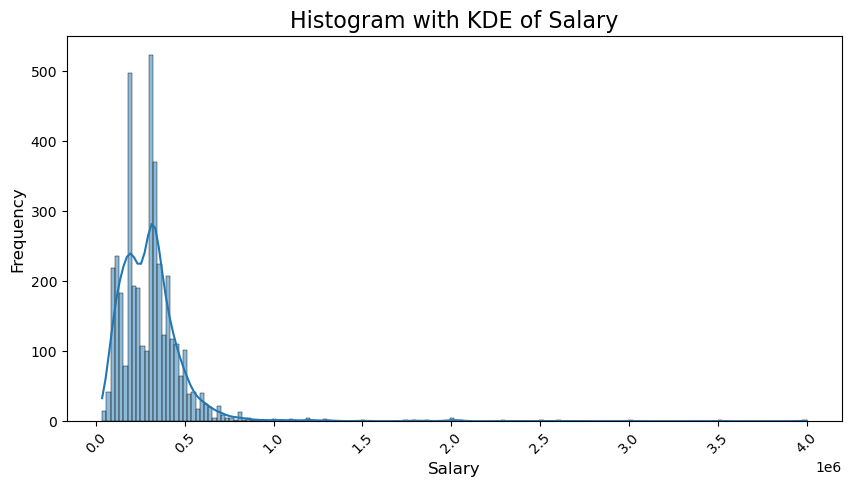

In [132]:
plt.figure(figsize=(10, 5))
sns.histplot(data['Salary'], kde=True)
plt.xticks(rotation=45)
plt.xlabel('Salary', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Histogram with KDE of Salary', fontsize=16)
plt.show()


Positive Skewness: The distribution of salaries exhibits positive skewness, indicating that the majority of salaries are clustered towards the lower end of the range, with a tail extending towards higher salaries.

Median < Mean: The median salary (50th percentile) of $300,000 is lower than the mean salary of approximately $307,700. This difference suggests that the distribution is right-skewed, as the mean is pulled towards the higher salaries by the presence of a few extremely high values.

Long Right Tail: The distribution has a long right tail, with a maximum salary of $4,000,000. This indicates the presence of outliers or individuals with significantly higher salaries, which contribute to the skewness of the distribution.

#### KDE Plot on numerical columns

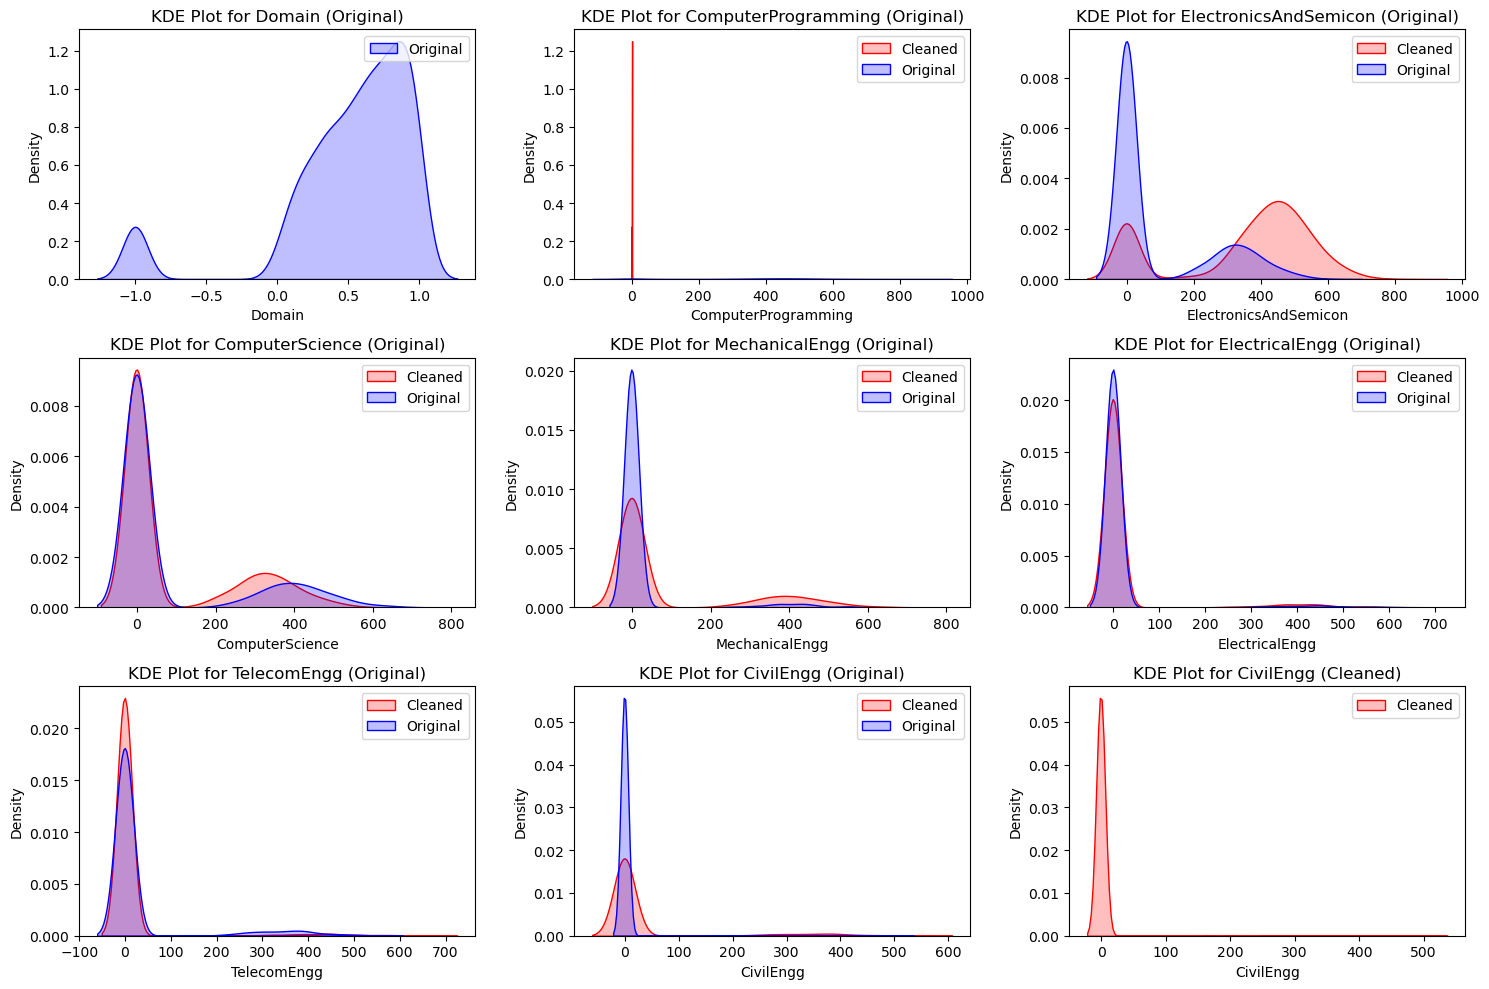

In [133]:
columns_with_missing_values = ['Domain', 'ComputerProgramming', 'ElectronicsAndSemicon', 
                               'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 
                               'TelecomEngg', 'CivilEngg']

# Replace '-1' with NaN and drop rows with NaN in specified columns
cleaned_data = data.replace('-1', np.nan).dropna(subset=['Domain'] + columns_with_missing_values)

# Create subplots
plt.figure(figsize=(15,10))
for i, column in enumerate(columns_with_missing_values):
    # Original data KDE plot
    plt.subplot(3, 3, i+1)
    sns.kdeplot(data[column], shade=True, label='Original', color='blue')
    plt.title(f'KDE Plot for {column} (Original)')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.legend()
    
    # Cleaned data KDE plot
    plt.subplot(3, 3, i+2)
    sns.kdeplot(cleaned_data[column], shade=True, label='Cleaned', color='red')
    plt.title(f'KDE Plot for {column} (Cleaned)')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()


### Bivariant Analysis

#### ctegorical-categorical

#### Bar Plot of Top 15 Designations by Gender

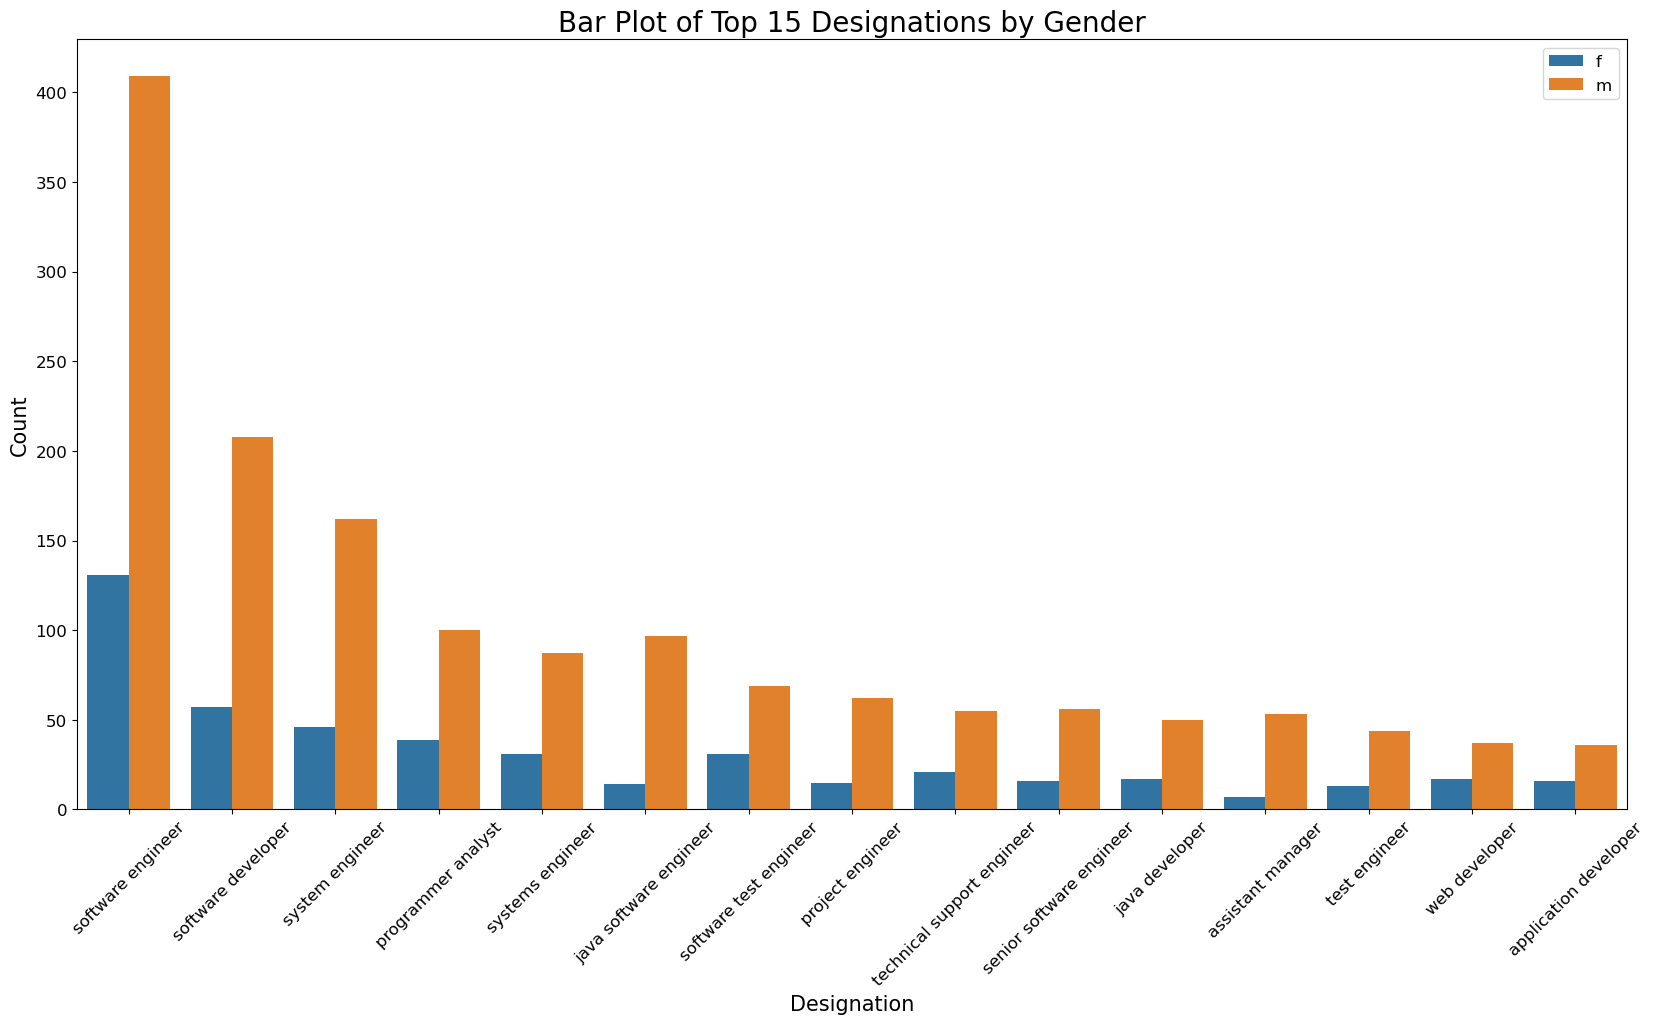

In [134]:


# Get the top 15 most common designations
top_15_designations = data['Designation'].value_counts().head(15).index

# Filter the data to include only the top 15 designations
data_filtered = data[data['Designation'].isin(top_15_designations)]

# Sort the data by the count of each designation
data_sorted = data_filtered.groupby('Designation').size().reset_index(name='count')
data_sorted = data_sorted.sort_values(by='count', ascending=False)

plt.figure(figsize=(20, 10))
sns.countplot(x='Designation', hue='Gender', data=data_filtered, order=data_sorted['Designation'])
plt.title('Bar Plot of Top 15 Designations by Gender', fontsize=20)  # Add title
plt.xlabel('Designation', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.show()




Among males, 'Software Engineer' is the most common designation, with a count of 409, followed by 'Software Developer' with 208 occurrences, and 'System Engineer' with 162 occurrences.

On the other hand, among females, 'Software Engineer' also holds the top position with 131 occurrences, followed by 'Software Developer' with 57 occurrences, and 'System Engineer' with 46 occurrences.

It's evident that the titles 'Software Engineer' and 'Software Developer' are prevalent in both genders, while other designations like 'System Engineer' and 'Programmer Analyst' are more predominant among males.

Across various professions, male dominance is conspicuous, evidenced by substantial differences in frequency for each role

Here, we have considered the most prevalent roles pursued by AMCAT aspirants, predominantly in the IT sector

#### Count of Gender by Degree

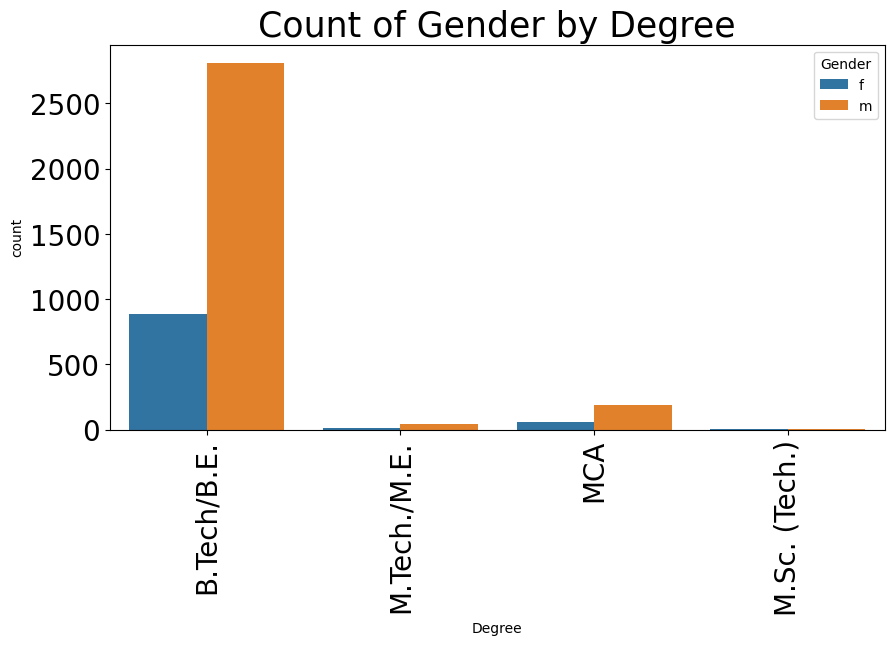

In [135]:
plt.figure(figsize=(10, 5))
sns.countplot(x="Degree", data=data, hue="Gender")
plt.title('Count of Gender by Degree', fontsize=25)  # Adding title
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)
plt.show()


#### CollegeTier vs. Degree with Gender Hue:

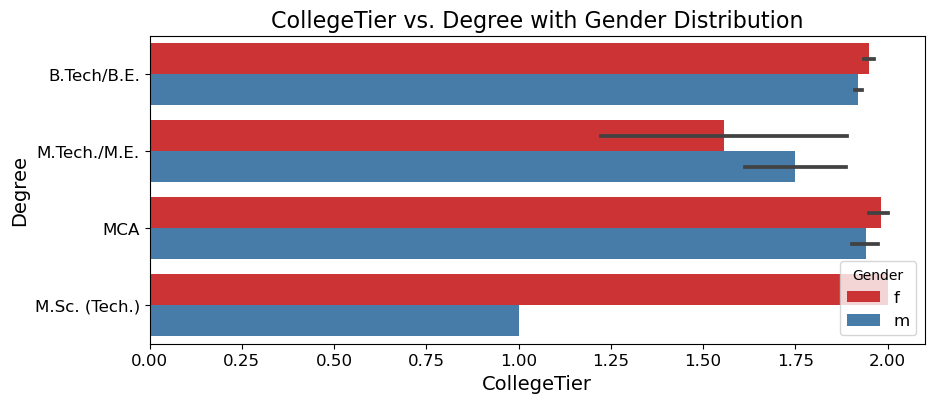

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 4))
sns.barplot(x='CollegeTier', y='Degree', data=data, hue='Gender', palette='Set1')
plt.title('CollegeTier vs. Degree with Gender Distribution', fontsize=16)
plt.xlabel('CollegeTier', fontsize=14)
plt.ylabel('Degree', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Gender', fontsize=12)
plt.show()



#### Top Specializations by Degree and College Tier

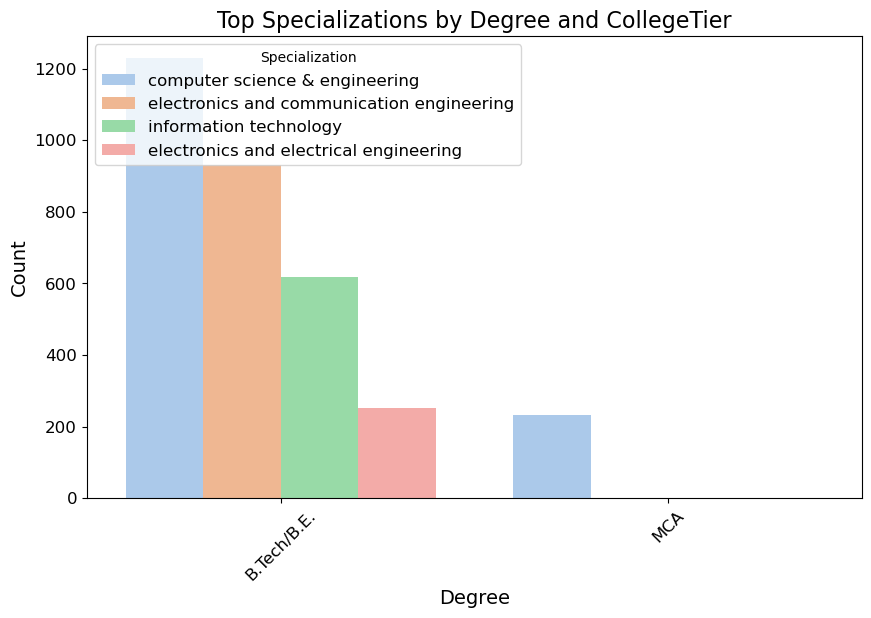

In [137]:

# Grouping the data by 'Degree', 'Specialization', and 'CollegeTier', then counting occurrences of 'Gender'
grouped_data = data.groupby(['Degree', 'Specialization', 'CollegeTier'])['Gender'].count()

# Sorting the grouped data in descending order and selecting the top values
sorted_data = grouped_data.sort_values(ascending=False).head()

# Resetting index to access the grouped columns
sorted_data = sorted_data.reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Degree', y='Gender', hue='Specialization', data=sorted_data, palette='pastel')
plt.title('Top Specializations by Degree and CollegeTier', fontsize=16)
plt.xlabel('Degree', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.legend(title='Specialization', fontsize=12)
plt.show()



1)The most common degree among the top entries is 'B.Tech/B.E.'.

2)'Computer Science & Engineering' is the predominant specialization across different college tiers, indicating its popularity among students.

3)The majority of students pursuing 'B.Tech/B.E.' with 'Computer Science & Engineering' specialization are enrolled in CollegeTier 2 institutions, highlighting the concentration of this field in mid-tier colleges.

#### Count of Gender by Designation and JobCity

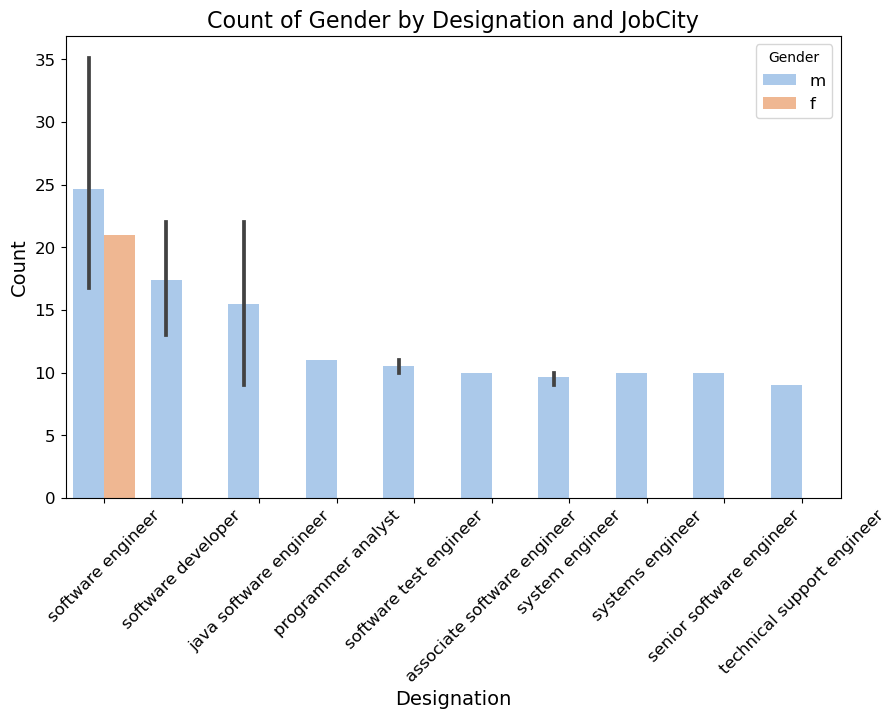

In [138]:
# Grouping the data by 'Designation', 'Specialization', and 'JobCity', then counting occurrences of 'Gender'
grouped_data = data.groupby(['Designation', 'Specialization', 'JobCity', 'Gender']).size().reset_index(name='Count')

# Sorting the grouped data in descending order and selecting the top values
sorted_data = grouped_data.sort_values(by='Count',ascending=False).head(30)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Designation', y='Count', hue='Gender', data=sorted_data, palette='pastel')
plt.title('Count of Gender by Designation and JobCity', fontsize=16)
plt.xlabel('Designation', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.legend(title='Gender', fontsize=12)
plt.show()


1)The most common designation for males in Bengaluru is 'software engineer' with a specialization in 'computer science & engineering', followed by 'software developer' in 'computer science & engineering' in Greater Noida.

2)Among females in Bengaluru, the most common designation is also 'software engineer' with a specialization in 'computer science & engineering'.

3)In terms of job cities, Bengaluru seems to have the highest concentration of male software engineers, followed by Greater Noida and Hyderabad.

4)For males, the top three specializations within the designation of 'software engineer' are 'computer science & engineering', 'electronics and communication engineering', and 'information technology', mainly located in Bengaluru.

5)'Software engineer' is the most common designation for males, while 'software developer' is also prevalent, particularly in Greater Noida and Delhi.


### categorical-numerical

#### Salary Distribution by Specialization

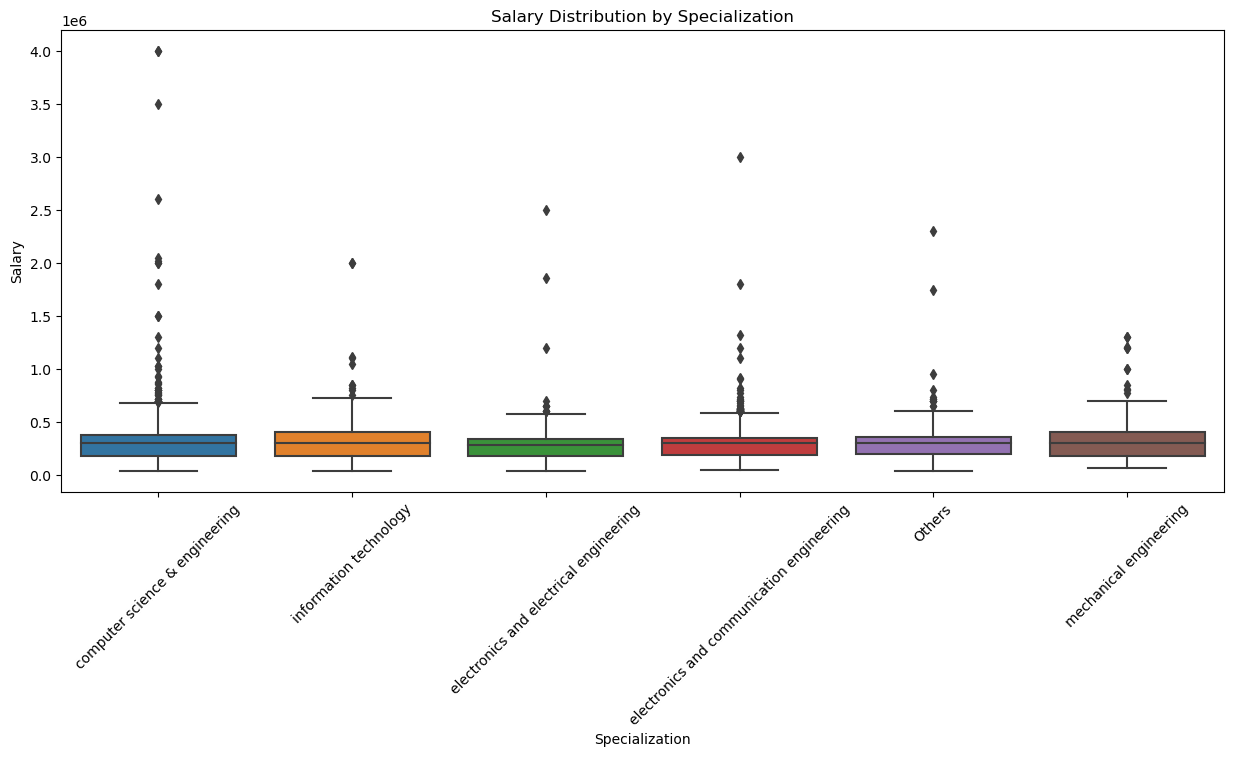

In [139]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='Specialization', y='Salary', data=data)
plt.title('Salary Distribution by Specialization')
plt.xlabel('Specialization')
plt.ylabel('Salary')
plt.xticks(rotation=45)
plt.show()


1)Top-Paying Specializations: "Polymer Technology" and "Computer Networking" offer the highest average salaries, followed by "Information Science" and "Industrial & Production Engineering."

2)Diverse Choices: The list includes various fields like engineering (e.g., chemical, civil), information technology (e.g., computer networking), and industrial production, providing a wide range of career options.

3)Engineering Dominance: Engineering specializations dominate the top positions, indicating the value of engineering expertise in the job market.

#### Salary Distribution by Designation

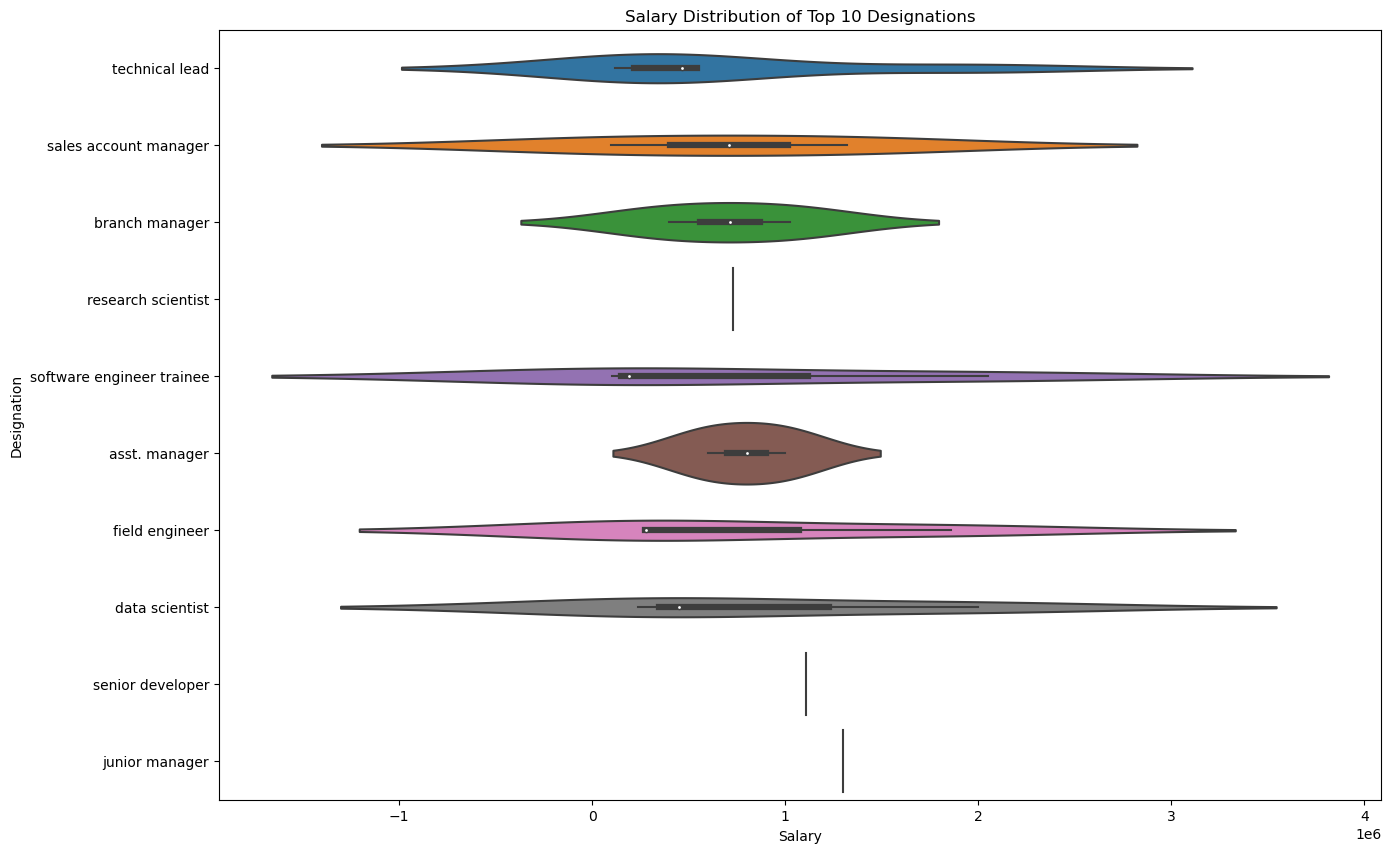

In [140]:


# Get the top 10 designations sorted by mean salary
top_10_sorted = data.groupby('Designation')['Salary'].mean().nlargest(10).reset_index()

# Set the order of designations for plotting in ascending order
order = top_10_sorted.sort_values(by='Salary')['Designation']

# Filter data for top 10 designations
filtered_data = data[data['Designation'].isin(top_10_sorted['Designation'])]

# Plot the violin plot
plt.figure(figsize=(15, 10))
sns.violinplot(data=filtered_data, y='Designation', x='Salary',order=order)
plt.xlabel('Salary')
plt.ylabel('Designation')
plt.title('Salary Distribution of Top 10 Designations')
plt.show()



1)Technical Lead: This designation typically commands the highest salary among the listed roles.

2)Sales Account Manager: The average salary for this position falls below that of a Technical Lead.

3)Branch Manager: On average, Branch Managers earn less than Sales Account Managers.

4)Research Scientist: The salary for this role is relatively lower compared to managerial positions.

5)Software Engineer Trainee: Entry-level positions like Software Engineer Trainee tend to offer lower salaries.

6)Assistant Manager: Although higher than entry-level positions, Assistant Manager salaries are typically lower compared to managerial roles like Branch Manager and Sales Account Manager.

7)Field Engineer: Similar to Research Scientist, Field Engineers generally receive lower compensation.

8)Data Scientist: While Data Scientists are highly valued, the average salary may be lower compared to roles such as Technical Lead.

9)Senior Developer: Senior Developers typically receive competitive salaries, although they may be lower than managerial positions.

10)Junior Manager: This role likely offers a lower salary compared to higher-ranking managerial positions.


#### Top Salaries by Degree, Specialization, and CollegeTier

<Figure size 1200x800 with 0 Axes>

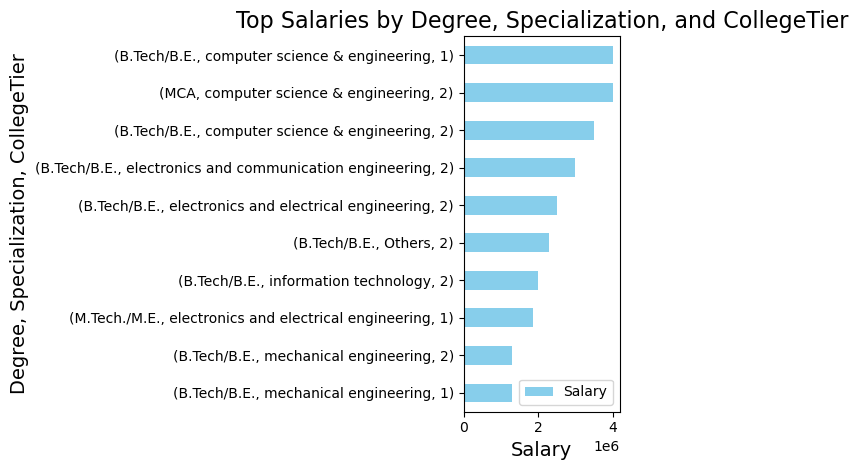

In [141]:
# Data
top_salaries = pd.pivot_table(data, index=["Degree", "Specialization", "CollegeTier"], values="Salary", aggfunc='max').sort_values(by='Salary', ascending=False).head(10)
# Plot
# Plot
plt.figure(figsize=(12, 8))
top_salaries_sorted = top_salaries.sort_values(by='Salary', ascending=True)
top_salaries_sorted.plot(kind='barh', color='skyblue')
plt.title('Top Salaries by Degree, Specialization, and CollegeTier', fontsize=16)
plt.xlabel('Salary', fontsize=14)
plt.ylabel('Degree, Specialization, CollegeTier', fontsize=14)
plt.tight_layout()
plt.show()




1)The highest salary of 4,000,000 rs is associated with an individual holding an MCA degree, specialized in Computer Application, and enrolled in a college with a Tier 2 rating.

2)Following closely is another 4,000,000 salary linked to a B.Tech/B.E. graduate specializing in Computer Engineering from a Tier 1 college.

3)The third-highest salary stands at 3,500,000.

4)Subsequently, the fourth position is occupied by an individual from Electronics and Communication Engineering background, earning 3,000,000.

5)The fifth position is held by a graduate in Electronics and Electrical Engineering, with a salary of 2,500,000.






#### Average Salaries by Degree, Specialization, and CollegeTier

<Figure size 1200x800 with 0 Axes>

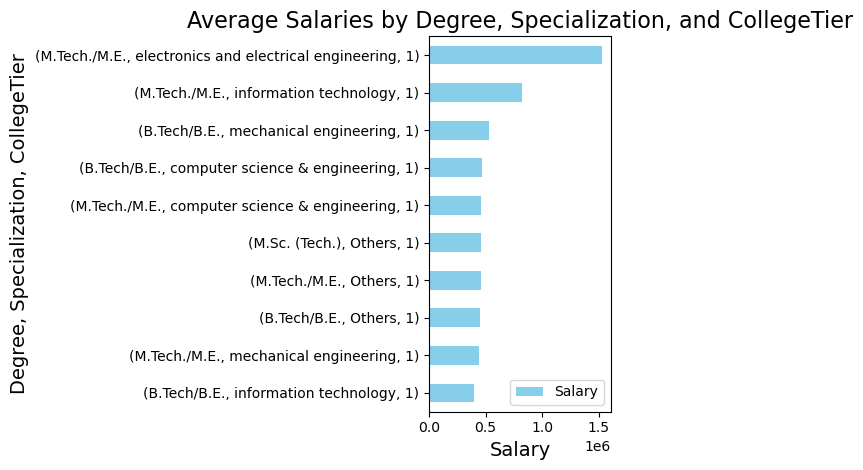

In [142]:
# Data
top_salaries = pd.pivot_table(data, index=["Degree", "Specialization", "CollegeTier"], values="Salary", aggfunc='mean').sort_values(by='Salary', ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 8))
top_salaries_sorted = top_salaries.sort_values(by='Salary', ascending=True)
top_salaries_sorted.plot(kind='barh', color='skyblue')
plt.title('Average Salaries by Degree, Specialization, and CollegeTier', fontsize=16)
plt.xlabel('Salary', fontsize=14)
plt.ylabel('Degree, Specialization, CollegeTier', fontsize=14)
plt.tight_layout()
plt.show()



1)M.Tech./M.E. graduates in electrical engineering from CollegeTier 1 have the highest average salary of 1,860,000.

2)M.Tech./M.E. graduates in electronics and electrical engineering from CollegeTier 1 have an average salary of 1,200,000.

3)Information technology graduates from CollegeTier 1 have an average salary of 820,000.

4)Polymer technology graduates from CollegeTier 1 have an average salary of 700,000.

5)B.Tech/B.E. graduates in industrial & production engineering from CollegeTier 1 have an average salary of 600,000.

## Bivariant Analysis

### Numerical-Numerical

#### Scatter Plot of Salary vs College GPA

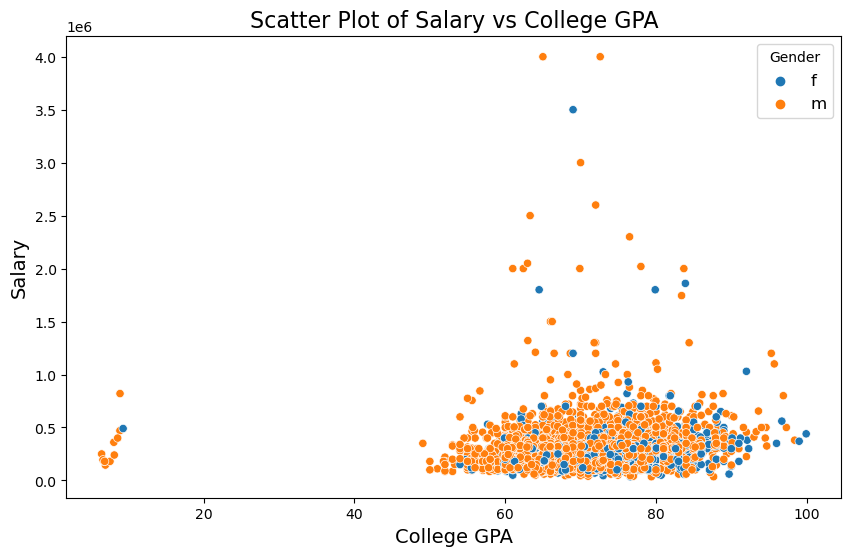

In [143]:
# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='collegeGPA', y='Salary', hue='Gender', data=data)
plt.xlabel('College GPA', fontsize=14)  # X-axis label
plt.ylabel('Salary', fontsize=14)        # Y-axis label
plt.title('Scatter Plot of Salary vs College GPA', fontsize=16)  # Title
plt.legend(title='Gender', fontsize=12)  # Legend
plt.show()


1)The majority of both men and women have CGPA scores in the range of 70-75, indicating a similar academic performance level.

2)There is no discernible relationship between GPA and salary discrepancy based on gender, as both distributions overlap extensively.

####  Regression Plot: Am_Score vs Salary,Overall Percentage vs Salary

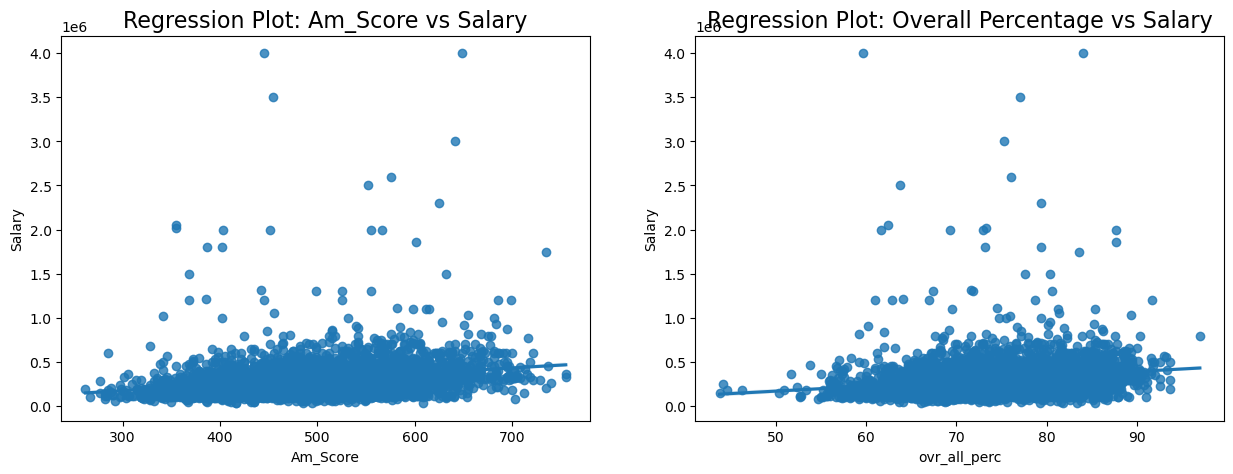

In [144]:

plt.figure(figsize=(15,5))

# Calculate new columns
data['Am_Score'] = (data['Logical'] + data['Quant'] + data['English']) / 3
data['ovr_all_perc'] = (data['10percentage'] + data['12percentage'] + data['collegeGPA']) / 3

# Subplot 1
plt.subplot(1,2,1)
sns.regplot(x='Am_Score', y='Salary', data=data)
plt.title('Regression Plot: Am_Score vs Salary', fontsize=16)  # Title for subplot 1

# Subplot 2
plt.subplot(1,2,2)
sns.regplot(x='ovr_all_perc', y='Salary', data=data)
plt.title('Regression Plot: Overall Percentage vs Salary', fontsize=16)  # Title for subplot 2

plt.show()


We can observe a positive correlation between salary and both the average score and overall performance of academic.

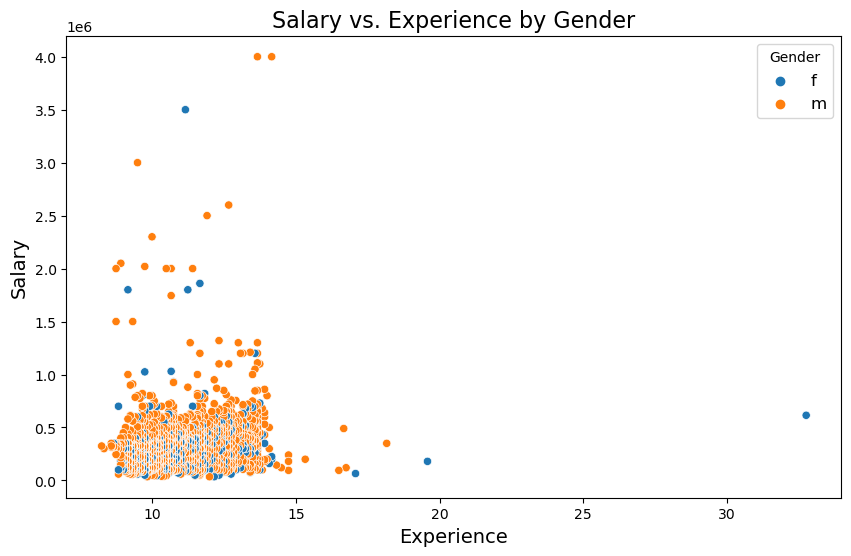

In [145]:
# Grouping the data by "Salary" and calculating the mean experience
avg_experience_salary = data.groupby("Salary")["Experience_years"].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Experience_years', y='Salary', hue='Gender', data=data)
plt.title('Salary vs. Experience by Gender', fontsize=16)
plt.xlabel('Experience', fontsize=14)
plt.ylabel('Salary', fontsize=14)
plt.legend(title='Gender', fontsize=12)
plt.show()



1)Salary generally increases with experience.

2)Some variation exists in salaries for individuals with similar experience.

3)Outliers are present where individuals with significant experience have relatively low salaries, and vice versa.

4)The rate of salary increase may slow down after a certain point of experience.
It's essential to consider gender differences in salary at different experience levels to ensure fair compensation practices

#### Salary Distribution by Age and Gender

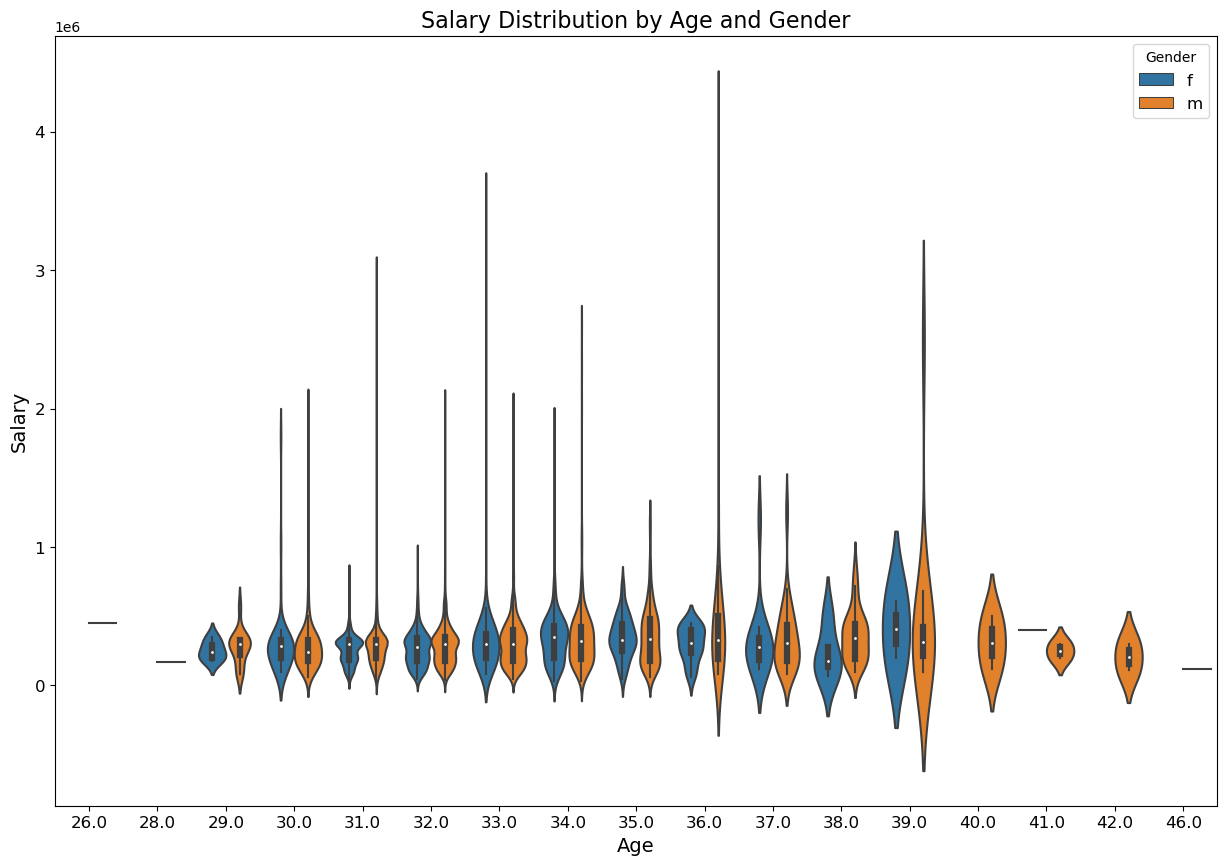

In [148]:
plt.figure(figsize=(15, 10))
sns.violinplot(x='Age', y='Salary', hue='Gender', data=data)
plt.title('Salary Distribution by Age and Gender', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Salary', fontsize=14)
plt.legend(title='Gender', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()



Males generally earn higher salaries across different age groups.

Some females outearn males, suggesting progress in gender wage equality.

Salary trends with age are not strictly linear, indicating varying career trajectories.

The relationship between age and salary is influenced by various factors beyond age alone.

Understanding these additional factors is crucial for career planning and salary negotiation strategies.

#### Relationship between Technical Skills Score and AM Score by Gender and Specialization

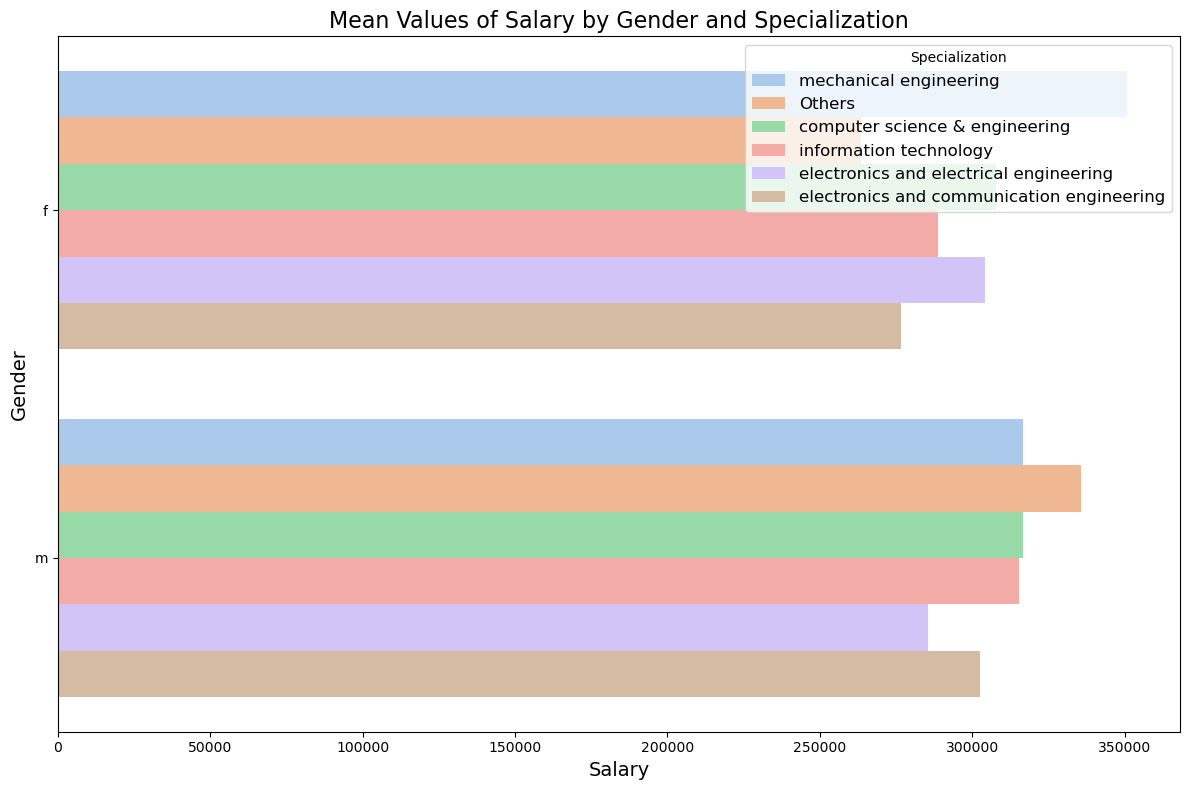

In [168]:
# Reset index to make the pivot table columns accessible
pivot_table = pivot_table.reset_index()
# Sorting the pivot table by Salary
pivot_table_sorted = pivot_table.sort_values(by='Salary', ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='Salary', y='Gender', hue='Specialization', data=pivot_table_sorted, palette='pastel')
plt.title('Mean Values of Salary by Gender and Specialization', fontsize=16)
plt.xlabel('Salary', fontsize=14)
plt.ylabel('Gender', fontsize=14)
plt.legend(title='Specialization', fontsize=12)
plt.tight_layout()
plt.show()




Gender Comparison:

Among females, the highest mean AM score is observed in the field of mechanical engineering.
For males, the highest mean AM score is seen in the "Others" category.

Specialization Analysis:

In the field of computer science & engineering, both males and females have relatively high mean AM scores.
The specialization with the highest mean salary differs between genders. For females, it's mechanical engineering, while for males, it's in the "Others" category.

Technical Skills:
Across all specializations, males generally have higher mean technical skills scores compared to females.
The field of electronics and communication engineering shows the highest mean technical skills scores for both genders.

In [180]:
# Step 1: Filter the Data
desired_roles = ['programming analyst', 'software engineer', 'hardware engineer', 'associate engineer']
filtered_data = data[data['Designation'].isin(desired_roles)]

# Step 2: Check if Data is Available
if filtered_data.empty:
    print("No data available for the specified roles.")
else:
    # Step 3: Calculate Average Salary
    avg_sal_role = filtered_data.groupby('Designation')['Salary'].mean()

    # Step 4: Compare with Claim
    claimed_salary_range = (250000, 300000)  # 2.5-3 lakhs
    for role, average_salary in avg_sal_role.items():
        print(f"Average salary for {role}: {average_salary:.2f} INR")
        if claimed_salary_range[0] <= average_salary <= claimed_salary_range[1]:
            print(f"The claim for {role} falls within the claimed salary range.")
        else:
            print(f"The claim for {role} does not fall within the claimed salary range.")

Average salary for associate engineer: 290000.00 INR
The claim for associate engineer falls within the claimed salary range.
Average salary for hardware engineer: 281250.00 INR
The claim for hardware engineer falls within the claimed salary range.
Average salary for software engineer: 340953.70 INR
The claim for software engineer does not fall within the claimed salary range.


In [181]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(data['Gender'], data['Specialization'])

# Perform Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Interpret results
alpha = 0.05
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
if p < alpha:
    print("There is a significant relationship between gender and specialization.")
else:
    print("There is no significant relationship between gender and specialization.")


Chi-square statistic: 42.47544801461402
P-value: 4.719517200799934e-08
There is a significant relationship between gender and specialization.


### Based on the analysis of the entire dataset, several conclusions can be drawn as per my observation:

#### 1)Gender Disparity:
There is a noticeable gender disparity in salary, with males generally earning higher salaries compared to females.

This gender gap is consistent across different specializations and does not appear to be specific to any particular field

#### 2)Specialization Impact:
Specialization plays a significant role in determining salary levels, with certain fields commanding higher salaries than others.

Fields like computer science & engineering, electronics and communication engineering, and mechanical engineering tend to offer higher salaries compared to others.

#### 3)Technical Skills and Salary:

There is a positive correlation between technical skills scores and salary levels. Individuals with higher technical skills tend to command higher salaries.

However, this correlation may not be the sole determining factor, as other factors like experience, education level, and negotiation skills also influence salary levels.

#### 4)Education Level:

Individuals with advanced degrees (e.g., M.Tech./M.E., MCA) generally earn higher salaries compared to those with bachelor's degrees (B.Tech/B.E.).

Higher education levels may open up opportunities for more lucrative positions and career advancement.

#### 5)Experience Impact:

Experience significantly impacts salary levels, with individuals having more years of experience typically earning higher salaries.

This underscores the importance of continuous learning and professional development to increase earning potential over time.

#### 6)Academic Performance and Salary:

There is a positive correlation between academic performance (as measured by marks in 10th and 12th grades, as well as GPA in college) and salary levels.

Individuals with higher marks and GPA tend to command higher salaries, indicating that academic excellence is valued in the job market.

#### 7)10th and 12th Grade Performance:
Higher marks in 10th and 12th grades are indicative of strong foundational knowledge and academic abilities, which can translate to better job opportunities and higher salaries.

Employers may view candidates with excellent 10th and 12th grade marks as more capable and suitable for competitive positions.

#### 8)College GPA:

College GPA serves as a measure of a candidate's performance and dedication during their higher education years.

A higher GPA suggests a strong work ethic, commitment to studies, and mastery of academic subjects, which are qualities highly valued by employers.

#### 9)Impact on Career Opportunities:

Academic performance, including marks and GPA, can significantly influence career opportunities and advancement prospects.

Individuals with impressive academic records may have access to prestigious job positions, better salary packages, and opportunities for career growth and development.

#### 10)Holistic Evaluation:

While academic performance is important, employers also consider other factors such as practical skills, experience, and soft skills during the hiring process.

A combination of academic excellence, practical skills, and interpersonal abilities can enhance a candidate's overall employability and contribute to long-term career success.

 In summary, strong academic performance, as reflected in marks and GPA, can positively impact salary levels and career opportunities. However, it is essential for individuals to complement their academic achievements with practical skills and experiences to thrive in the competitive job market.while factors like gender, specialization, education level, and technical skills play crucial roles in determining salary levels, factors such as experience and negotiation skills also contribute significantly. Efforts to address gender disparity and enhance technical skills could lead to more equitable salary distributions and better career prospects for all individuals in the workforce.







                       ***************************************************************************
                                 *******************************************************
                                               ***************************
                                                        Thank You 